# Analyse the reason why cluster 6 has most highest mse and mae

In [66]:
import pandas as pd
from ML_figures.figures import element_prevalence
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [57]:
BEST_DEPTH = 10
N_SPLITS = 10
RANDOM_STATE = 42

In [19]:
# read data

cluster_6 = pd.read_csv('../data/clustered_by_all_features/domain_based_data_cluster_6.csv')

total_data = pd.read_csv('../data/cleaned_data.csv')

In [20]:
cluster_6.head()

,crystal_system,space_group,band_gap,volume,density,density_atomic,formation_energy_per_atom,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster,e_electronic,e_ionic,e_total,class
0,4,12,0.3593,66.249645,8.647377,16.562411,-1.022655,8.0,80.0,72.0,...,102.000000,1.69,3.44,1.75,2.642500,6,5.807363,3.770194,9.577558,train
1,1,82,0.8566,176.302334,4.805648,25.186048,-0.806761,25.0,34.0,9.0,...,123.285714,1.55,2.55,1.00,2.195714,6,7.738875,3.180481,10.919357,train
2,1,87,0.7410,477.837198,8.461799,29.864825,-0.427286,34.0,81.0,47.0,...,135.250000,1.62,2.55,0.93,1.995625,6,17.044781,23.694455,40.739235,train
3,0,225,0.0000,84.500391,11.709055,21.125098,-0.711750,45.0,77.0,32.0,...,169.750000,1.17,2.28,1.11,1.705000,6,34.331838,17.361222,51.693059,train
4,0,216,0.3773,58.883615,8.903879,19.627872,-0.515633,41.0,51.0,10.0,...,149.666667,1.60,2.20,0.60,1.950000,6,22.834900,15.195512,38.030412,train


In [21]:
cluster_6.nunique()

crystal_system                             7
space_group                              115
band_gap                                 932
volume                                  1063
density                                 1063
density_atomic                          1063
formation_energy_per_atom               1061
MagpieData minimum Number                 51
MagpieData maximum Number                 69
MagpieData range Number                   82
MagpieData mean Number                   477
MagpieData minimum CovalentRadius         27
MagpieData maximum CovalentRadius         48
MagpieData range CovalentRadius          127
MagpieData mean CovalentRadius           660
MagpieData minimum Electronegativity      56
MagpieData maximum Electronegativity      28
MagpieData range Electronegativity       253
MagpieData mean Electronegativity        804
cluster                                    1
e_electronic                            1063
e_ionic                                 1061
e_total   

In [22]:
# merge data
cluster_6 = pd.merge(cluster_6, total_data[['composition', 'formula_pretty', 'density']], on='density', how='left')


In [23]:
cluster_6.head()

,crystal_system,space_group,band_gap,volume,density,density_atomic,formation_energy_per_atom,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster,e_electronic,e_ionic,e_total,class,composition,formula_pretty
0,4,12,0.3593,66.249645,8.647377,16.562411,-1.022655,8.0,80.0,72.0,...,3.44,1.75,2.642500,6,5.807363,3.770194,9.577558,train,Cd1 Hg1 O2,CdHgO2
1,1,82,0.8566,176.302334,4.805648,25.186048,-0.806761,25.0,34.0,9.0,...,2.55,1.00,2.195714,6,7.738875,3.180481,10.919357,train,Mn1 Ga2 Se4,Mn(GaSe2)2
2,1,87,0.7410,477.837198,8.461799,29.864825,-0.427286,34.0,81.0,47.0,...,2.55,0.93,1.995625,6,17.044781,23.694455,40.739235,train,Tl9 Sb1 Se6,Tl9SbSe6
3,0,225,0.0000,84.500391,11.709055,21.125098,-0.711750,45.0,77.0,32.0,...,2.28,1.11,1.705000,6,34.331838,17.361222,51.693059,train,Sm2 Ir1 Rh1,Sm2IrRh
4,0,216,0.3773,58.883615,8.903879,19.627872,-0.515633,41.0,51.0,10.0,...,2.20,0.60,1.950000,6,22.834900,15.195512,38.030412,train,Nb1 Sb1 Ru1,NbSbRu


In [16]:
cluster_6.shape

(1063, 25)

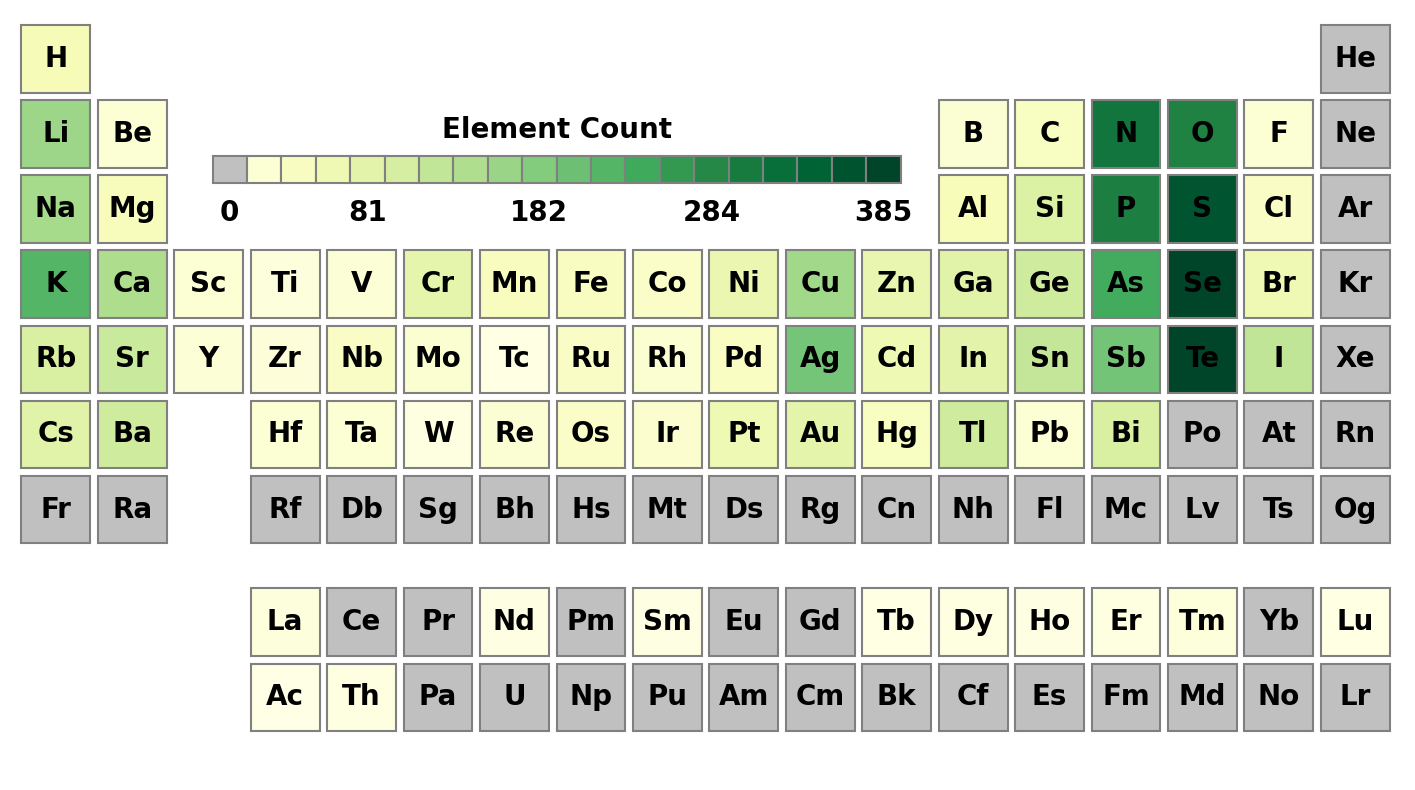

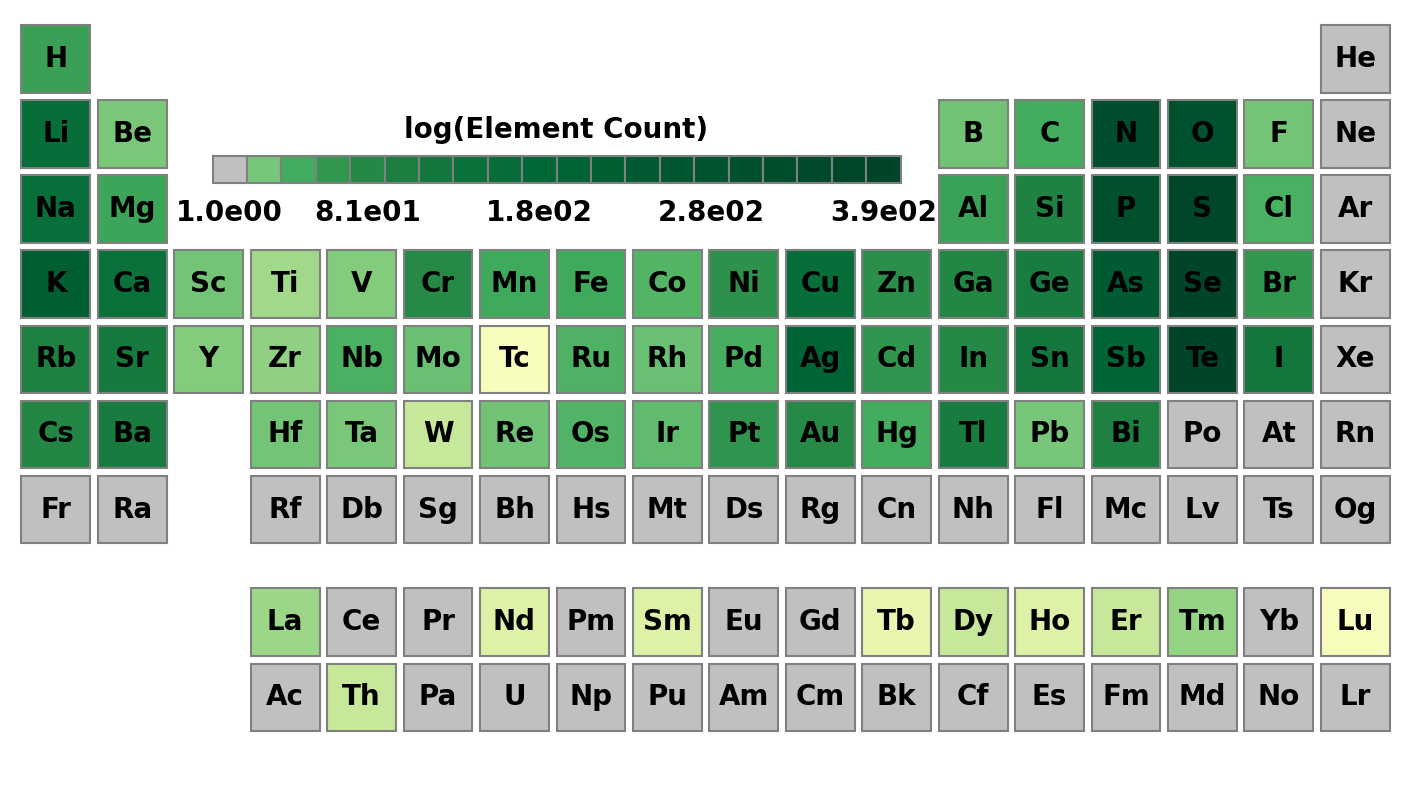

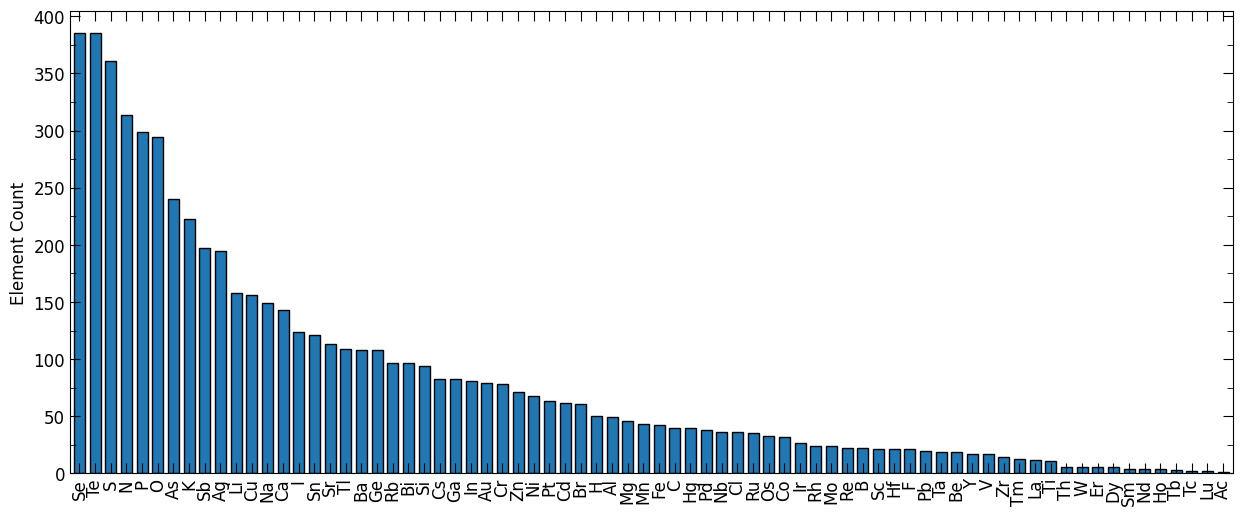

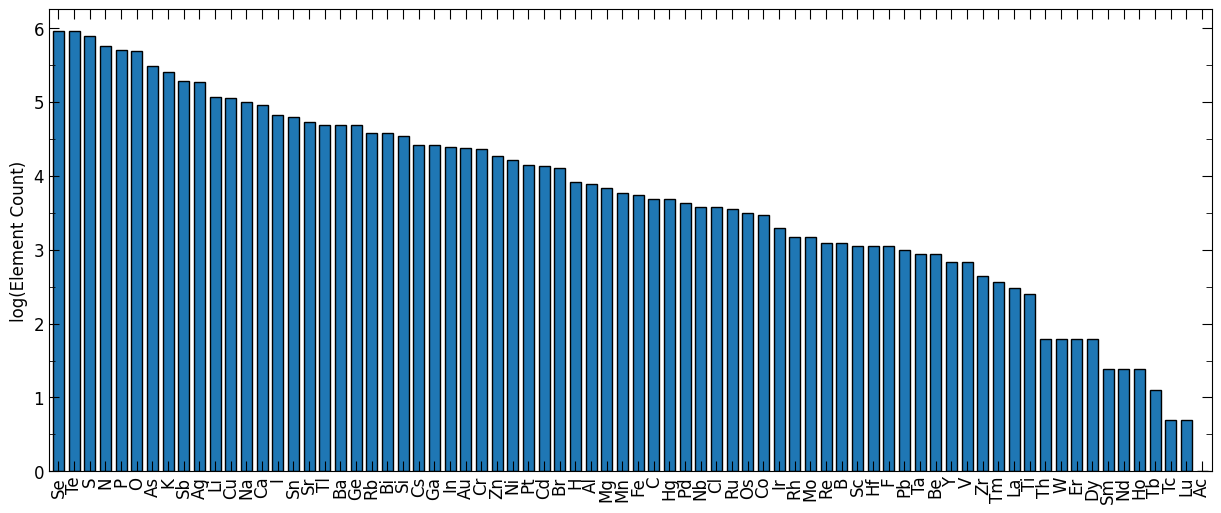

In [26]:
# 绘制元素分布图
# Visualize element prevalence
formula = cluster_6.iloc[:, -1]

save_dir = '../figures/element_prevalence/cluster_6/'
element_prevalence(formula,
                   name='element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=True)

plt.rcParams.update({'font.size': 12})
element_prevalence(formula,
                   name='element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=True)

In [28]:
cluster_6_density = list(cluster_6['density'])
total_data['is_cluster_6'] = total_data['density'].apply(lambda x: 1 if x in cluster_6_density else 0)
total_data.head()

,material_id,formula_pretty,composition,crystal_system,space_group,point_group,band_gap,volume,density,density_atomic,formation_energy_per_atom,e_total,e_ionic,e_electronic,is_cluster_6
0,mp-28967,Ba(PdS2)2,Ba2 Pd4 S8,4,11,2/m,0.7792,316.341404,5.022717,22.595815,-1.124079,17.048334,7.118969,9.929365,1
1,mp-766094,NbO2F,Nb4 O8 F4,3,19,222,2.8980,253.915299,3.764366,15.869706,-3.099174,17.572010,13.469477,4.102533,0
2,mp-36577,Sr(AsS2)2,Sr1 As2 S4,5,1,1,1.7212,196.220495,3.094976,28.031499,-0.766100,18.488667,12.443616,6.045051,0
3,mp-1102092,NaFe(SO4)2,Na4 Fe4 S8 O32,4,12,-1,2.0944,620.336826,2.901260,12.923684,-1.948264,9.596025,6.499905,3.096120,0
4,mp-720391,BH4NF4,B4 H16 N4 F16,3,62,mmm,7.4812,374.200384,1.860992,9.355010,-1.970766,6.216546,4.350314,1.866232,0


<Axes: xlabel='is_cluster_6', ylabel='band_gap'>

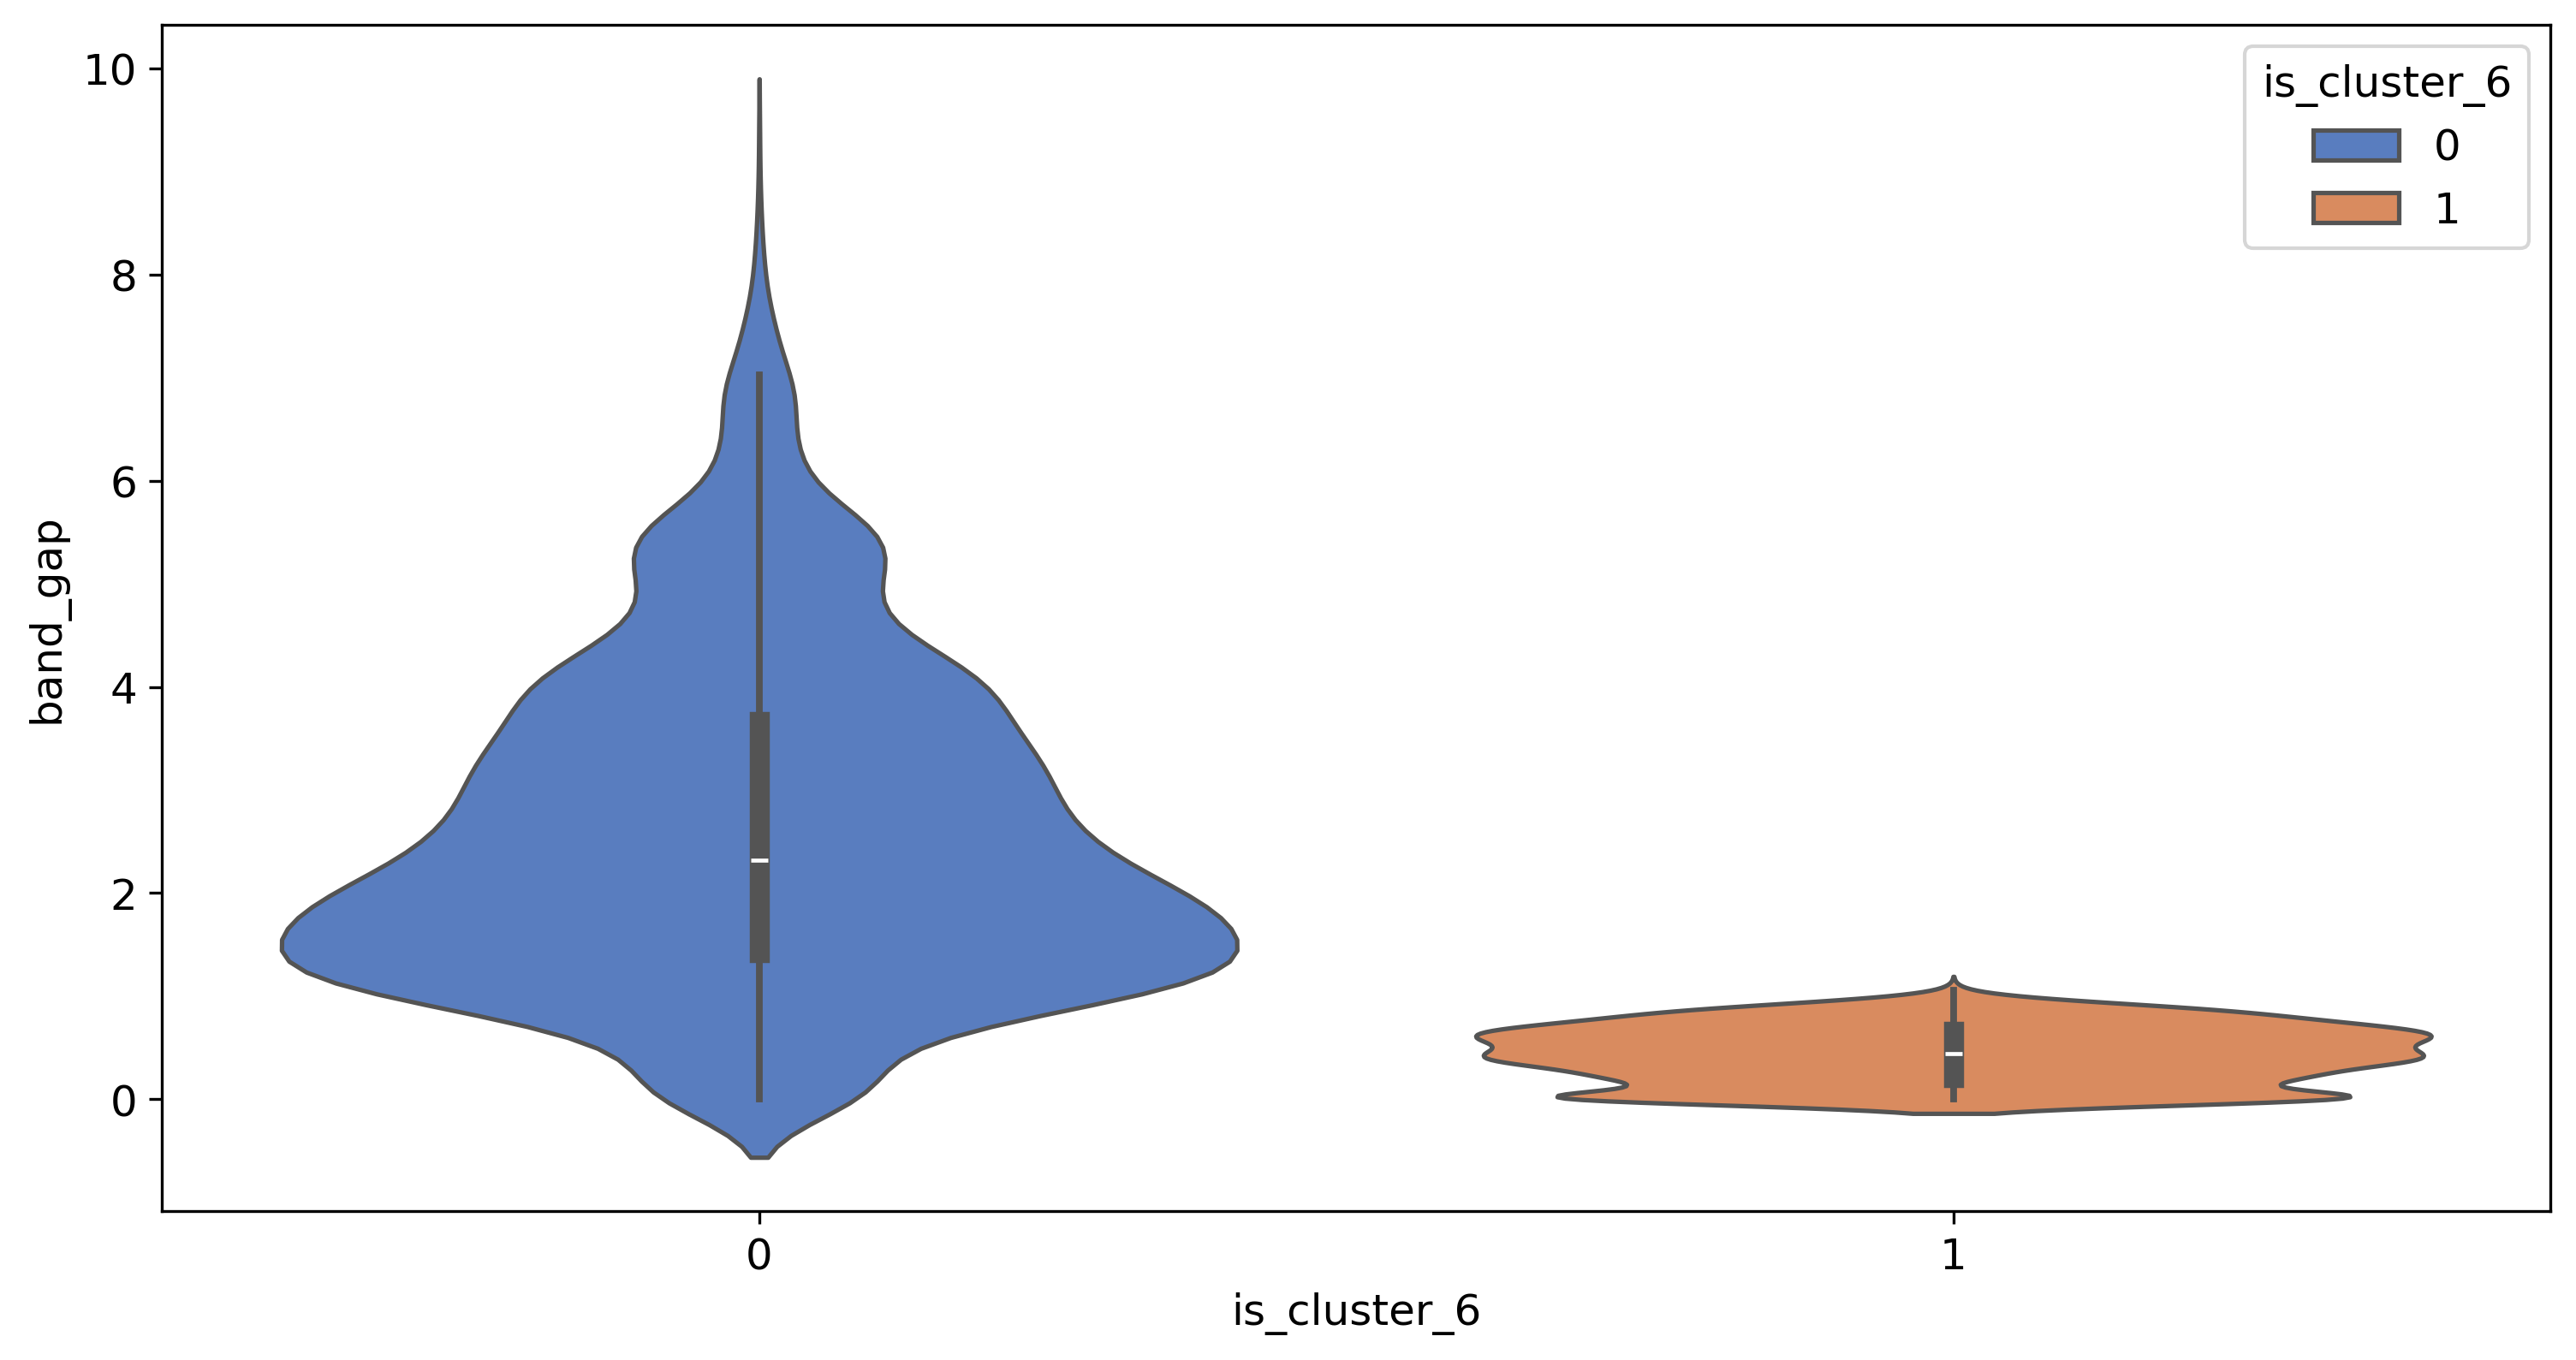

In [35]:
# Visualize band gap distribution
# 绘制cluster6的带隙分布小提琴图和所有数据的带隙分布小提琴图
plt.figure(figsize=(12, 6), dpi=300)
sns.violinplot(x='is_cluster_6', y='band_gap', data=total_data, palette='muted', hue='is_cluster_6')
plt.show()

- 可以发现Cluster 6的带隙分布更加集中在0-2eV之间

<Axes: xlabel='is_cluster_6', ylabel='formation_energy_per_atom'>

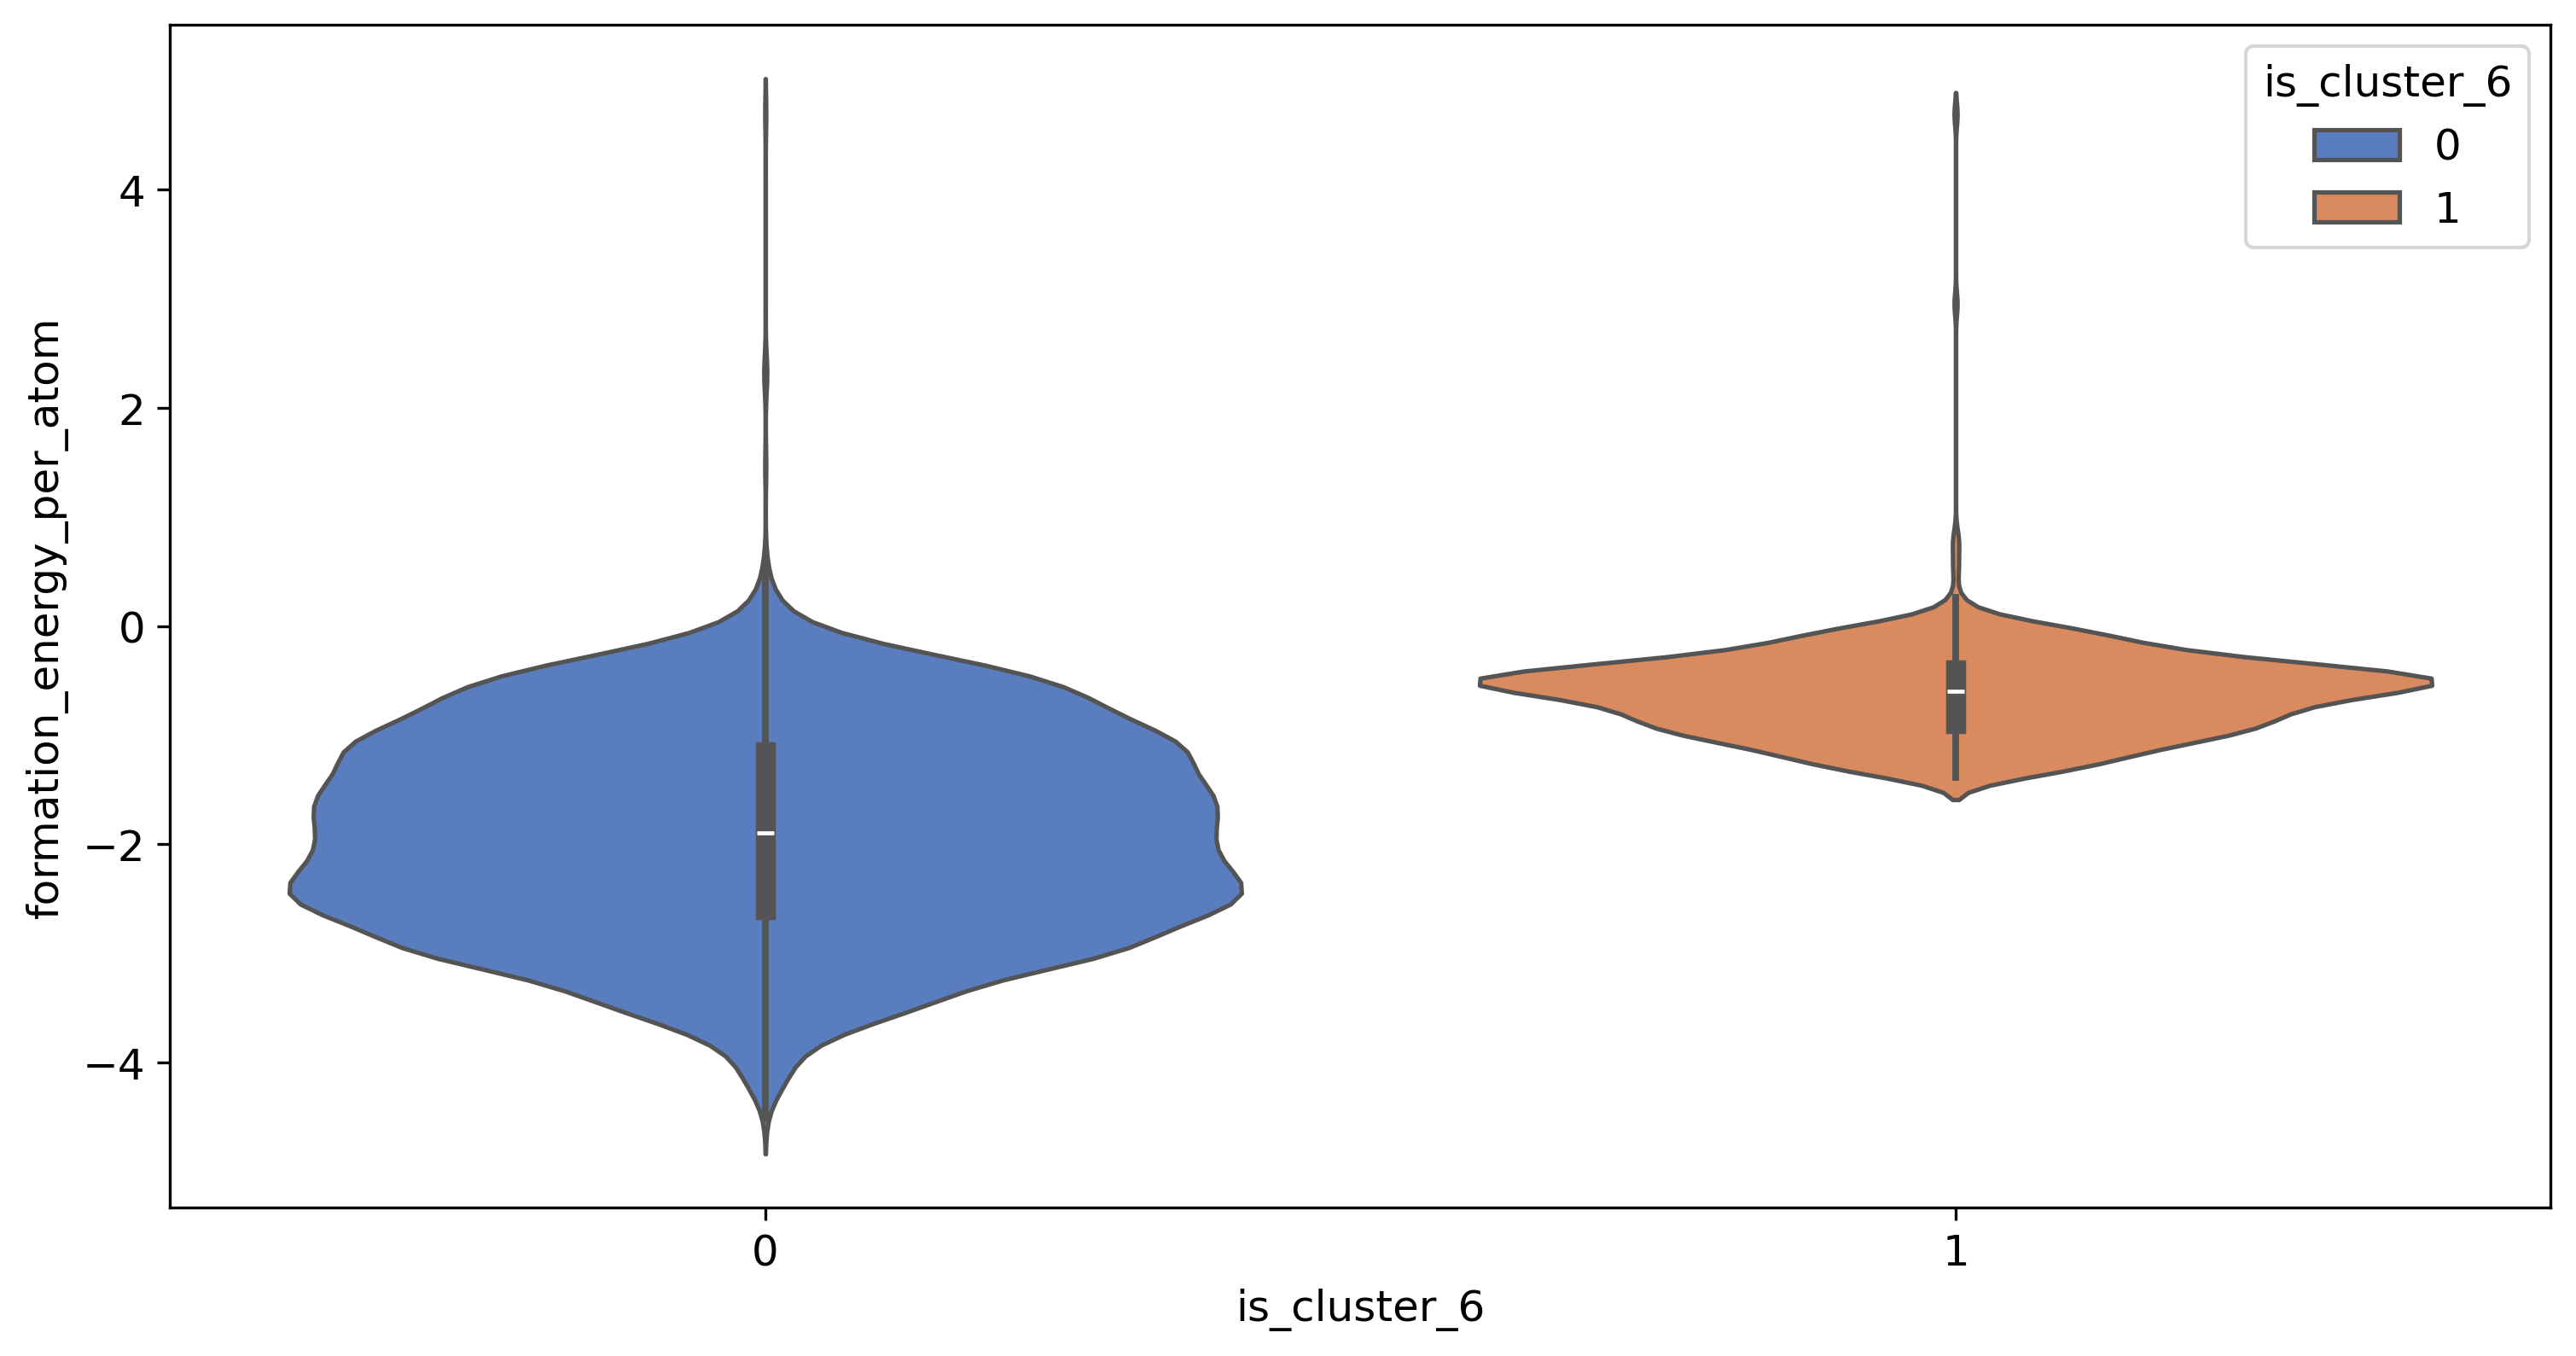

In [36]:
# Visualize the formation energy distribution
plt.figure(figsize=(12, 6), dpi=300)
sns.violinplot(x='is_cluster_6', y='formation_energy_per_atom', data=total_data, palette='muted', hue='is_cluster_6')
plt.show()

- 具有更高的原子形成能

<Axes: xlabel='is_cluster_6', ylabel='density'>

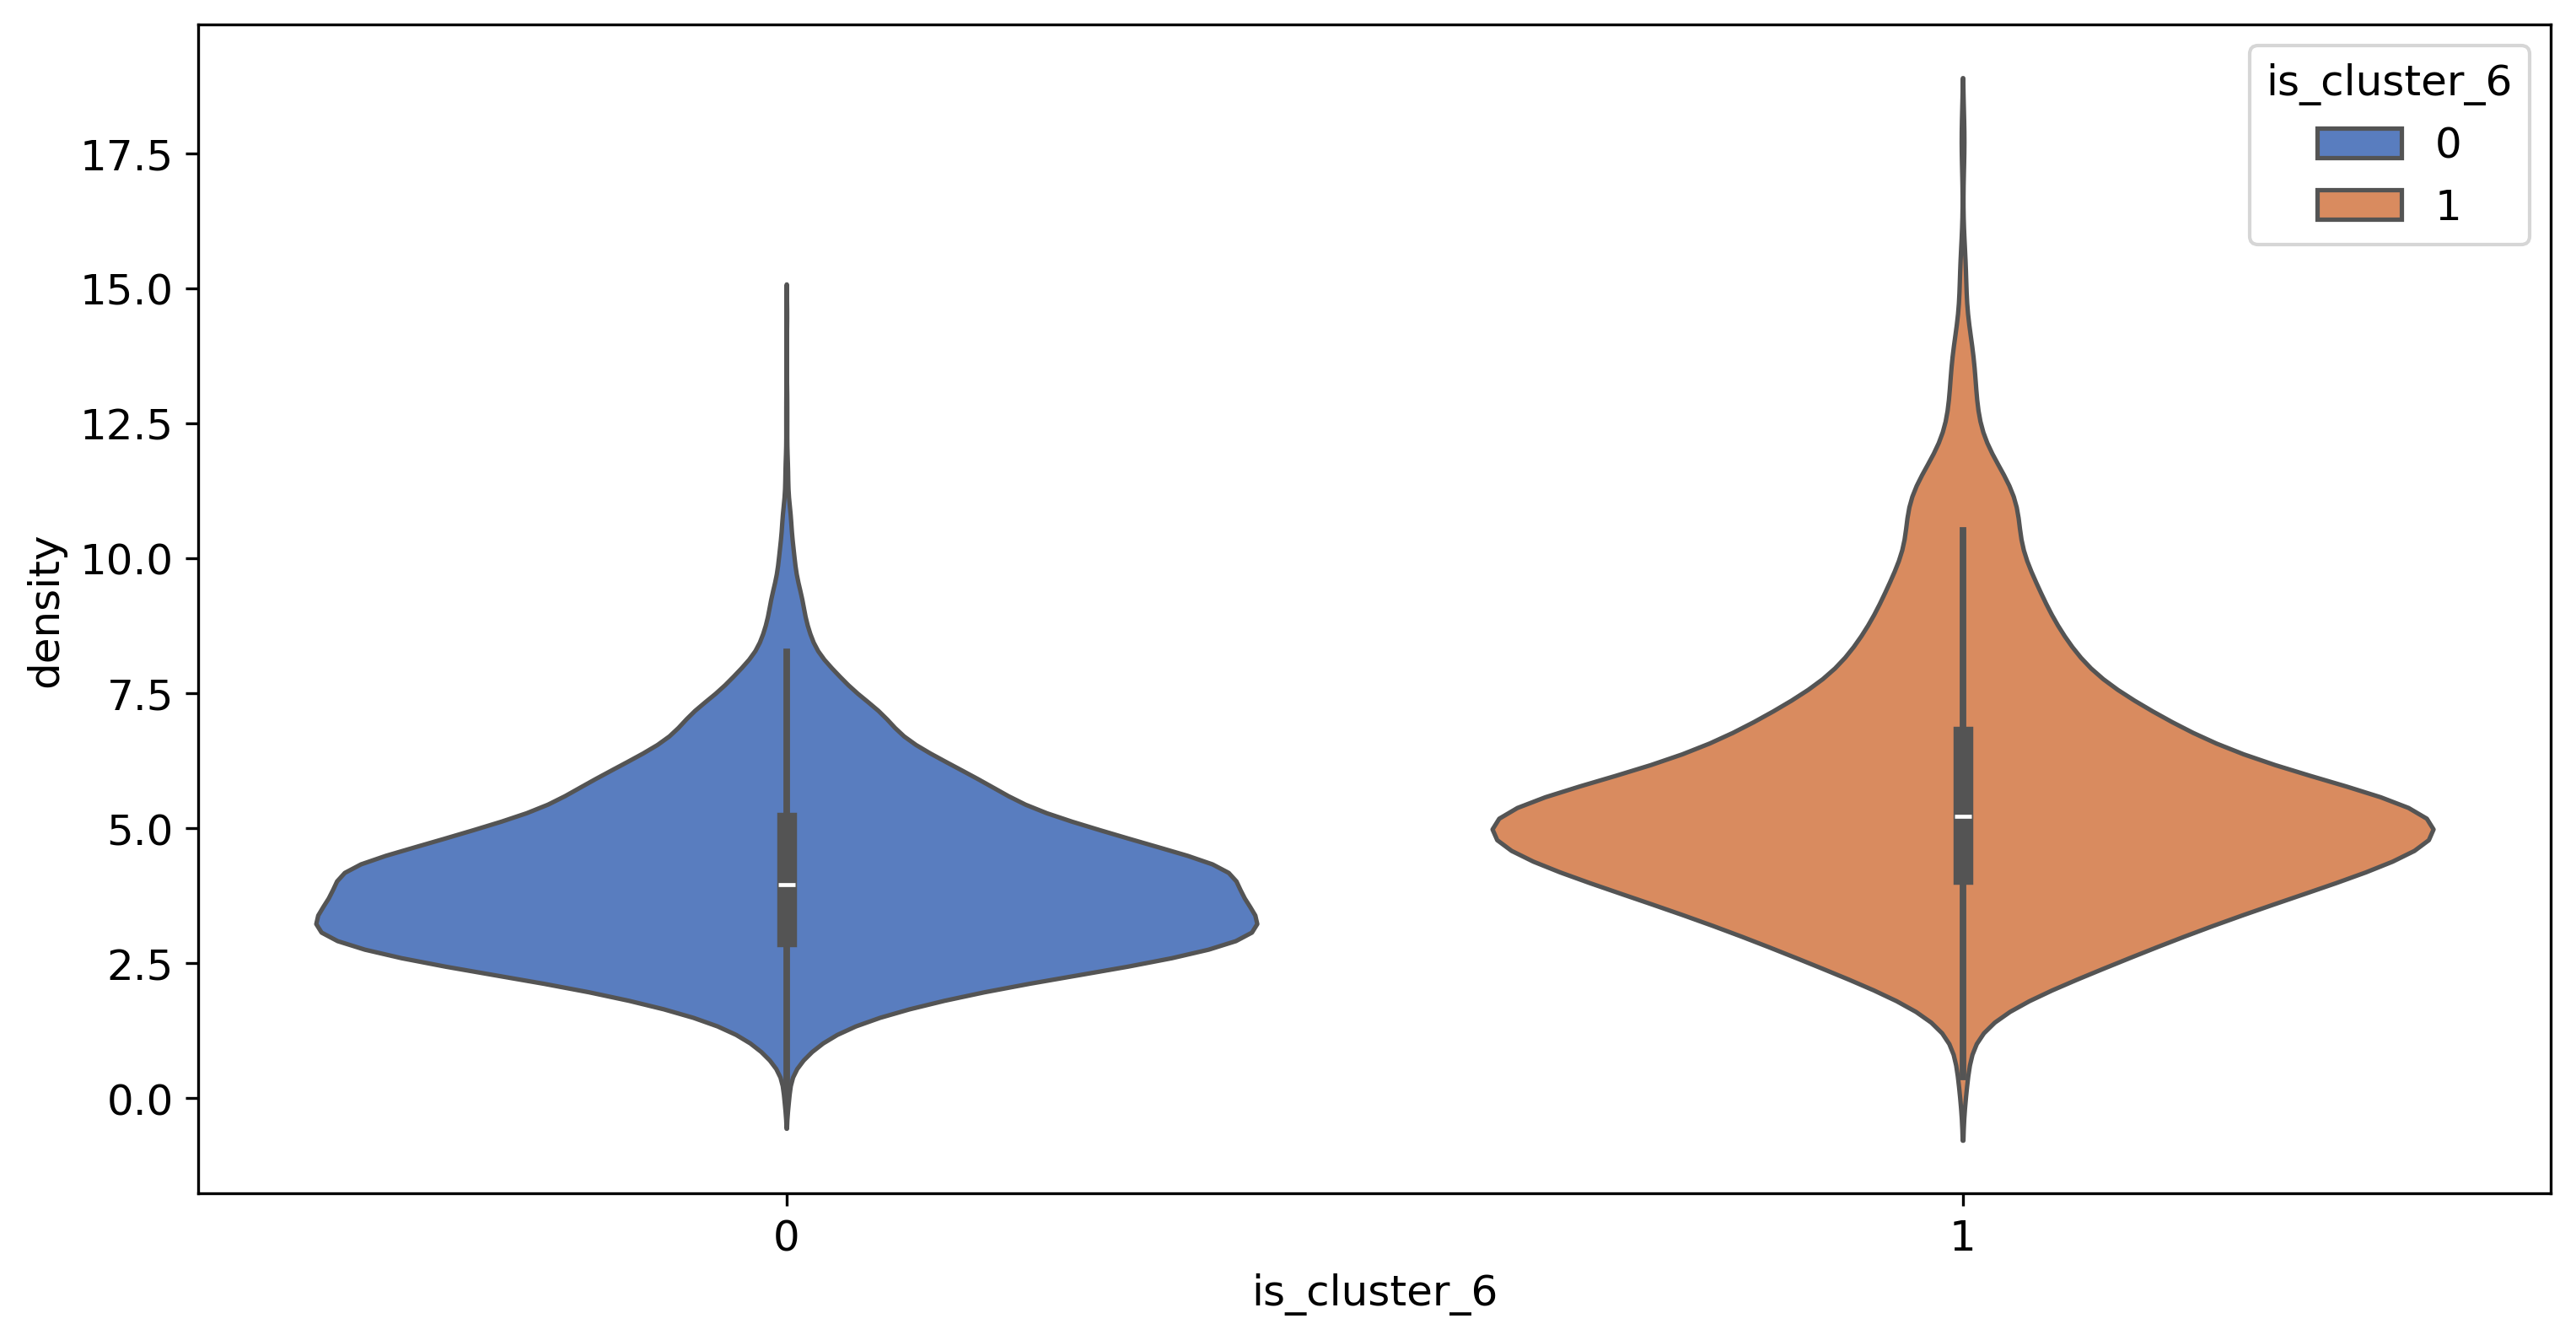

In [37]:
# Visualize the density distribution
plt.figure(figsize=(12, 6), dpi=300)
sns.violinplot(x='is_cluster_6', y='density', data=total_data, palette='muted', hue='is_cluster_6')
plt.show()

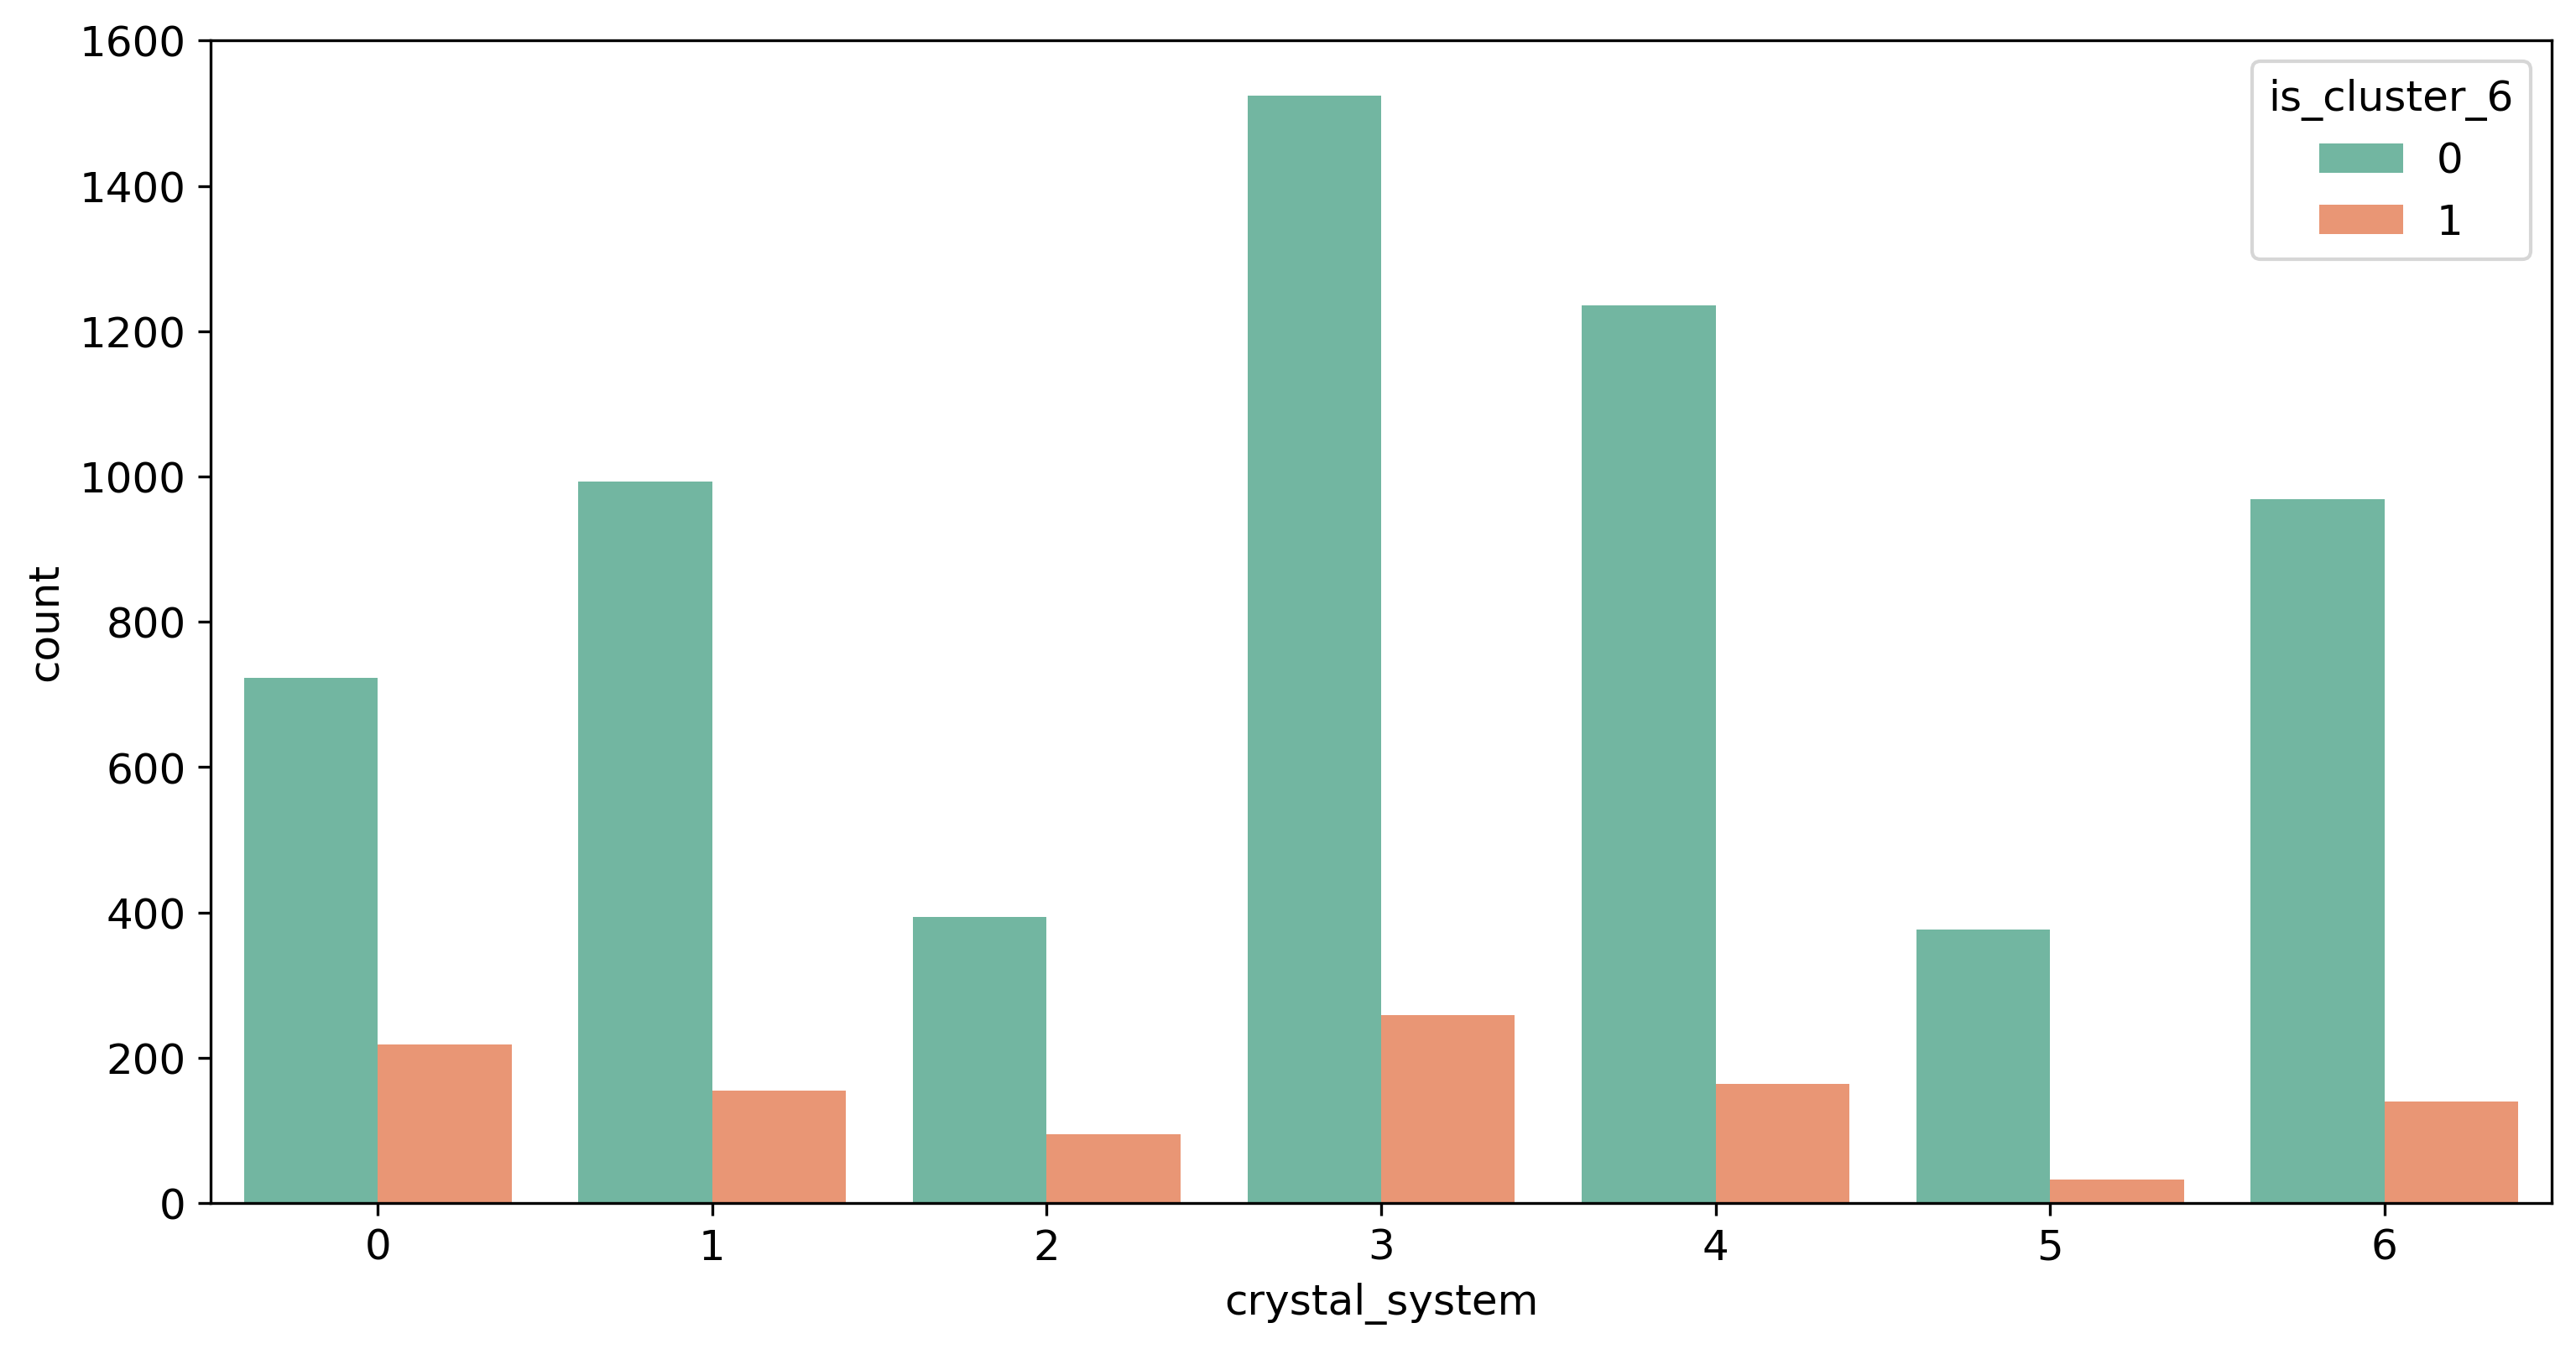

In [44]:
# 查看晶系分布
plt.figure(figsize=(12, 6), dpi=300)
sns.countplot(x='crystal_system', data=total_data, hue='is_cluster_6', palette='Set2')
plt.show()

# 单独训练cluster6的模型

In [53]:
def model_cross_train(model, X, y):
    '''Train the model model on X and return the results of cross-validation:
        1. scores（neg_root_mean_squared_error）
        2. y_hat'''
    kfold = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
    scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
    y_hat = cross_val_predict(model, X, y, cv=kfold)
    return scores, y_hat

# After determining all the hyperparameters, train the model on the entire training set with the best hyperparameters
def model_final_train(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def model_test(model, X_test, y_test):
    '''Test the model on the test set and return the results:
        1. mean_squared_error
        2. mean_absolute_error
        3. y_pred'''
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, mae, y_pred

In [68]:
# draw parity plot
def parity_plot(mse, mae, y_test, y_pred, y_name="e_electronic", title='Parity Plot', fig_path=None, dpi=300):
    # draw parity plot
    fig, ax = plt.subplots(figsize=(8, 8), dpi=dpi)
    ax.scatter(y_test, y_pred, s=2, c="#9cc3e5", marker="^")
    ax.plot(y_test, y_test, c="#aad390", zorder=-5)
    ax.set_title(title)
    # relative dielectric constant, no unit
    ax.set_xlabel("Actual " + y_name)
    ax.set_ylabel("Predicted " + y_name)
    # ax.set_xscale("log")
    # ax.set_yscale("log")
    # make it diagonal distribution
    ax.set_aspect("equal", adjustable="box")
    # set the range of x and y to be the same
    ax.set_xlim([0, 50])
    ax.set_ylim([0, 50])
    # inward ticks
    ax.tick_params(axis='both', direction='in', length=4) 

    ax.grid(True, linestyle="--", alpha=0.4)
    
    # draw mse and mae on the plot of top_left
    # Add bbox to the plot
    bbox_props = dict(boxstyle="round,pad=0.8", ec="#aad390", lw=0.6, facecolor="white", alpha=0.6)
    ax.text(0.05, 0.95, "MSE: {:.2f}\n\nMAE: {:.2f}".format(mse, mae), transform=ax.transAxes, 
            fontsize=6, c='#9cc3e5', verticalalignment='top', bbox=bbox_props)

    plt.show()
    if fig_path:
        # Is there the directory of the fig_path
        if not os.path.exists(fig_path):
            os.makedirs(fig_path)
        fig.savefig(fig_path+title+".png", dpi=dpi, bbox_inches='tight')

In [70]:
def plot_scores(mse, mae, y_train, y_hat, title='Parity Plot', fig_path=None, dpi=300):
    '''...'''
    print(f'MSE: {mse}, MAE: {mae}')

    # parity plot
    parity_plot(mse, mae, y_train, y_hat, y_name='e_electronic', title=title, fig_path=fig_path, dpi=dpi)

In [55]:
cluster_6.head()

,crystal_system,space_group,band_gap,volume,density,density_atomic,formation_energy_per_atom,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster,e_electronic,e_ionic,e_total,class,composition,formula_pretty
0,4,12,0.3593,66.249645,8.647377,16.562411,-1.022655,8.0,80.0,72.0,...,3.44,1.75,2.642500,6,5.807363,3.770194,9.577558,train,Cd1 Hg1 O2,CdHgO2
1,1,82,0.8566,176.302334,4.805648,25.186048,-0.806761,25.0,34.0,9.0,...,2.55,1.00,2.195714,6,7.738875,3.180481,10.919357,train,Mn1 Ga2 Se4,Mn(GaSe2)2
2,1,87,0.7410,477.837198,8.461799,29.864825,-0.427286,34.0,81.0,47.0,...,2.55,0.93,1.995625,6,17.044781,23.694455,40.739235,train,Tl9 Sb1 Se6,Tl9SbSe6
3,0,225,0.0000,84.500391,11.709055,21.125098,-0.711750,45.0,77.0,32.0,...,2.28,1.11,1.705000,6,34.331838,17.361222,51.693059,train,Sm2 Ir1 Rh1,Sm2IrRh
4,0,216,0.3773,58.883615,8.903879,19.627872,-0.515633,41.0,51.0,10.0,...,2.20,0.60,1.950000,6,22.834900,15.195512,38.030412,train,Nb1 Sb1 Ru1,NbSbRu


In [63]:
# read data
train_data = cluster_6[cluster_6['class'] == 'train']
test_data = cluster_6[cluster_6['class'] == 'test']

X_train = train_data.drop(['composition', 'formula_pretty', 'e_ionic', 'e_electronic', 'e_total', 'cluster', 'class'], axis=1)
y_train = train_data['e_electronic']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test = test_data.drop(['composition', 'formula_pretty', 'e_ionic', 'e_electronic', 'e_total', 'cluster', 'class'], axis=1)
X_test_scaled = scaler.transform(X_test)
y_test = test_data['e_electronic']

In [64]:
rf = RandomForestRegressor(n_estimators=100, max_depth=BEST_DEPTH, random_state=RANDOM_STATE)
rf = model_final_train(rf, X_train_scaled, y_train)

MSE: 573.8530614576194, MAE: 9.536683647371698


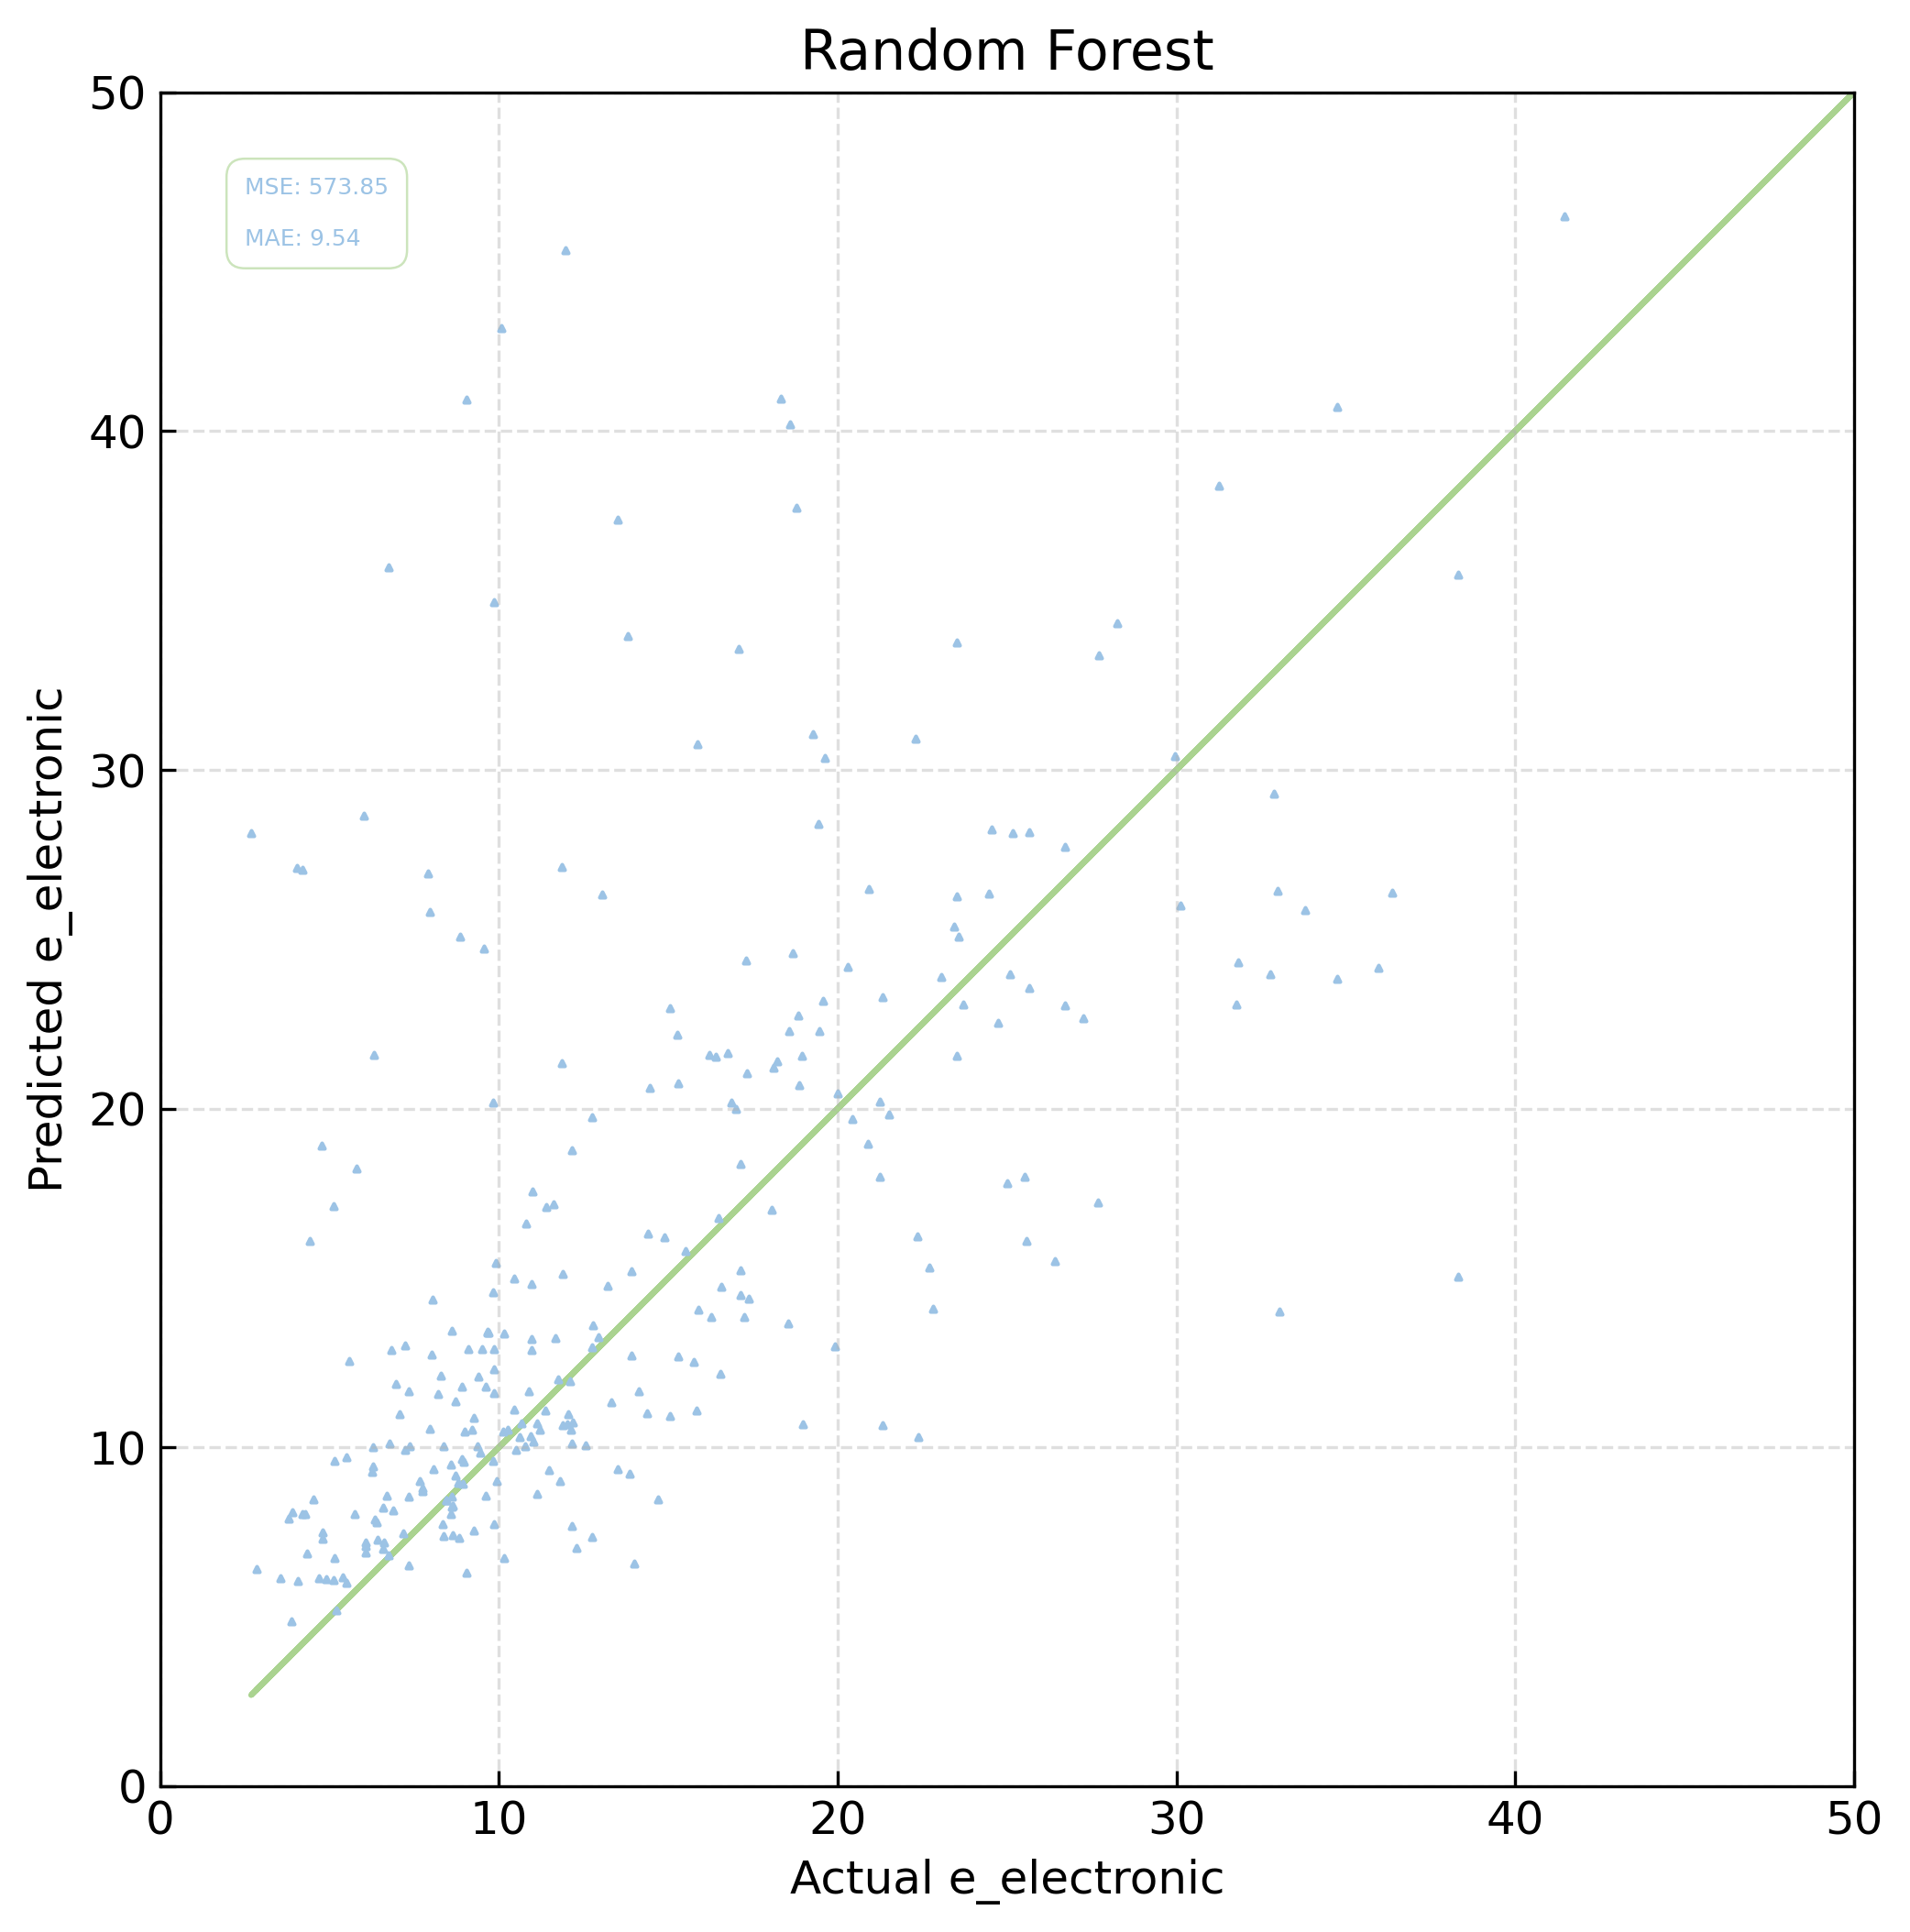

In [71]:
mse, mae, y_pred = model_test(rf, X_test_scaled, y_test)
plot_scores(mse, mae, y_test, y_pred, title='Random Forest', fig_path=None)